In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

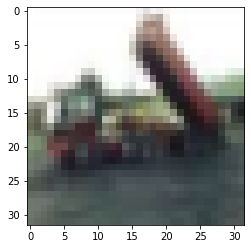

In [4]:
plt.imshow(X_train[2])

# Normalize the training data

In [5]:
X_train=X_train/255
X_test=X_test/255

In [6]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [7]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(12, activation='softmax')
])

In [8]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
cnn.fit(X_train, y_train, epochs=15)


Epoch 1/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.5849 - accuracy: 0.4197
Epoch 2/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.2447 - accuracy: 0.5559
Epoch 3/15
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1016 - accuracy: 0.6112
Epoch 4/15
1563/1563 [==============================] - 29s 18ms/step - loss: 1.0067 - accuracy: 0.6453
Epoch 5/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.9325 - accuracy: 0.6728
Epoch 6/15
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8753 - accuracy: 0.6960
Epoch 7/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8340 - accuracy: 0.7094
Epoch 8/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7967 - accuracy: 0.7219
Epoch 9/15
1563/1563 [==============================] - 29s 19ms/step - loss: 0.7535 - accuracy: 0.7376
Epoch 10/15
1563/1563 [==============================] - 29s 18m

In [10]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8833 - accuracy: 0.7150


[0.8832987546920776, 0.7149999737739563]

In [11]:
y_pred = cnn.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.69      0.75      1000
           1       0.86      0.81      0.83      1000
           2       0.63      0.61      0.62      1000
           3       0.67      0.35      0.46      1000
           4       0.59      0.77      0.67      1000
           5       0.61      0.64      0.62      1000
           6       0.74      0.81      0.77      1000
           7       0.74      0.77      0.75      1000
           8       0.82      0.83      0.83      1000
           9       0.72      0.87      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.71      0.71     10000

